# Random Forest and One-Class SVM for Email Spam Classifier


In [5]:
import numpy as np
import csv
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt


In [6]:
###### Read in the data

raw=[]
with open('../data/spambase.data') as cf:
    readcsv = csv.reader(cf, delimiter=',')
    for row in readcsv:
        raw.append(row)       
data = np.array(raw).astype(np.float)

x = data[:, :-1]
y = data[:, -1]

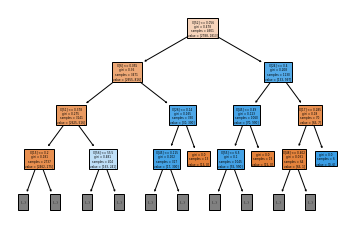

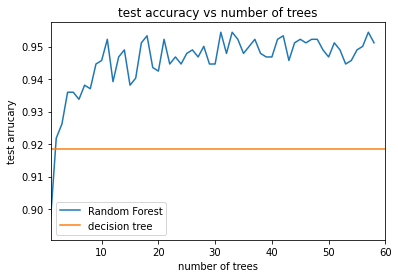

accuracy for decision tree: 0.919
accuracy for decision random forest: 0.954


In [7]:
# plot the tree##
ctree = tree.DecisionTreeClassifier().fit(x, y)
plt.figure() 
tree.plot_tree(ctree, max_depth=3, filled=True)
# plt.savefig('ctree.pdf')
plt.show()

score_forest = []

# training both tree and forest with different number of trees
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
for ntree in range(1,60): 

    
    cforest = RandomForestClassifier(n_estimators=ntree, max_depth=20).fit(xtrain, ytrain)
    ypre_forest = cforest.predict(xtest)
    acc = np.float((ytest==ypre_forest).sum())/len(ytest)
    score_forest.append(acc)

ctree2 = tree.DecisionTreeClassifier(max_depth=20).fit(xtrain, ytrain)
ypre_tree = ctree2.predict(xtest)
acc2 = np.float((ytest==ypre_tree).sum())/len(ytest)
    
plt.figure()
plt.plot(score_forest, label='Random Forest')
plt.plot([1, 60],[acc2,acc2], label='decision tree')
plt.title("test accuracy vs number of trees")
plt.xlabel("number of trees")
plt.ylabel("test arrucary")
plt.xlim([1,60])
plt.legend()
# plt.savefig('forest.pdf')
plt.show()


print('accuracy for decision tree: {:.3}'.format(acc2))
print('accuracy for decision random forest: {:.3}'.format(max(score_forest)))


In [8]:
with open("../data/spambase.data", "r") as f:
    data = np.array([ [ float(d) for d in line.strip("\n").split(",") ] for line in f.readlines() ])

label = data[:, 57]
label = label*-2 +1

xtrain, xtest, ytrain, ytest = train_test_split(data[:, 0:57],label, test_size = 0.2)

idx_normal = np.array(np.where(ytrain==1)).reshape(-1)
xtrain_normal = xtrain[idx_normal, :]

mdl = OneClassSVM(gamma='auto').fit(xtrain_normal)

ypred = mdl.predict(xtest)
matched = ypred==ytest
acc = matched.sum()/len(matched)

print('The test error: {:.2%}'.format(1-acc))

The test error: 37.24%


# Analysis
Words Here